In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from torchtext.utils import *
import warnings
warnings.filterwarnings("ignore")

In [0]:
bs = 64

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Root directory for dataset
dataroot = "/content/gdrive/My Drive/dataset3/"
#save_dir
save_dir = '/content/gdrive/My Drive/result_intel/'

In [0]:
data = ImageDataBunch.from_folder(dataroot, ds_tfms=get_transforms(), size=64)

In [0]:
data = (ImageList.from_folder(dataroot) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames              #Optionally add a test set (here default name is test)
        .transform(get_transforms(), size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())       

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

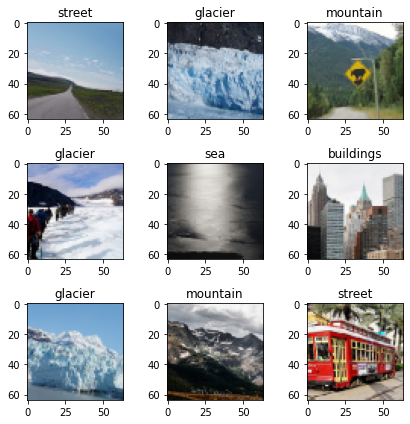

In [23]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [35]:
data.classes

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [36]:
data.train_ds

LabelList (14043 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
buildings,buildings,buildings,buildings,buildings
Path: /content/gdrive/My Drive/dataset3

In [37]:
data.valid_ds

LabelList (3000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: /content/gdrive/My Drive/dataset3

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [58]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.988465,0.662103,0.227667,01:33
1,0.644944,0.520786,0.196667,01:33
2,0.554144,0.417775,0.157333,01:33
3,0.475051,0.413432,0.152667,01:34


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f71b5efff28>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f71befd0320>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l

In [0]:
learn.save('stage-1')

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

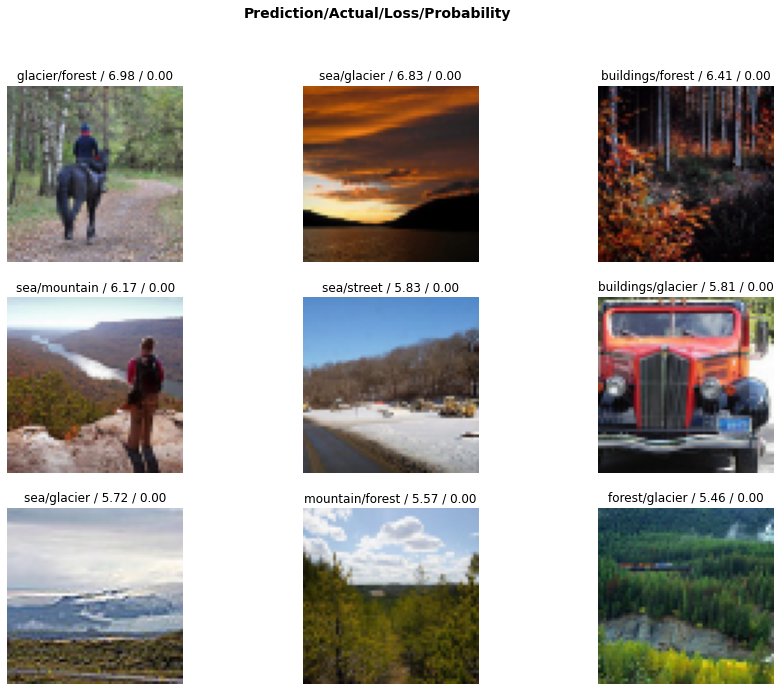

In [62]:
interp.plot_top_losses(9, figsize=(15,11))

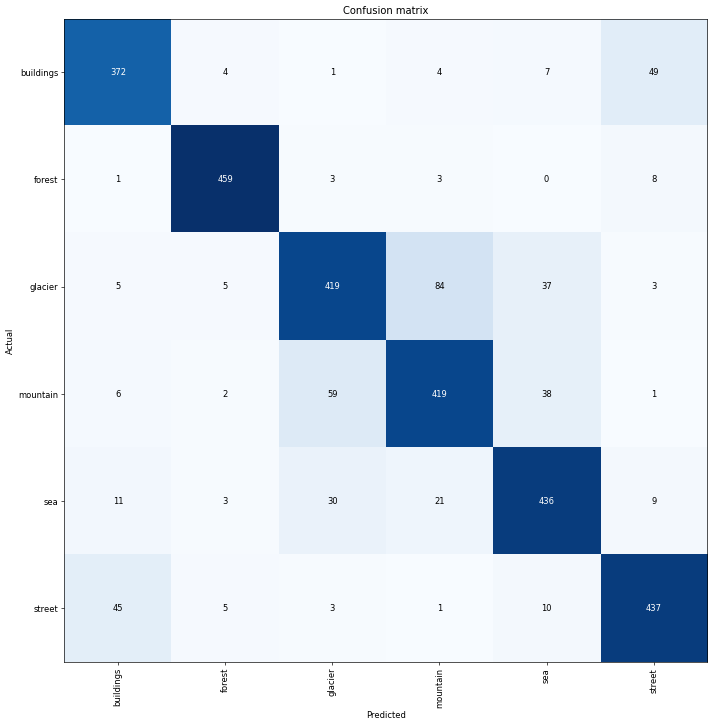

In [63]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
interp.most_confused(min_val=2)

[('glacier', 'mountain', 84),
 ('mountain', 'glacier', 59),
 ('buildings', 'street', 49),
 ('street', 'buildings', 45),
 ('mountain', 'sea', 38),
 ('glacier', 'sea', 37),
 ('sea', 'glacier', 30),
 ('sea', 'mountain', 21),
 ('sea', 'buildings', 11),
 ('street', 'sea', 10),
 ('sea', 'street', 9),
 ('forest', 'street', 8),
 ('buildings', 'sea', 7),
 ('mountain', 'buildings', 6),
 ('glacier', 'buildings', 5),
 ('glacier', 'forest', 5),
 ('street', 'forest', 5),
 ('buildings', 'forest', 4),
 ('buildings', 'mountain', 4),
 ('forest', 'glacier', 3),
 ('forest', 'mountain', 3),
 ('glacier', 'street', 3),
 ('sea', 'forest', 3),
 ('street', 'glacier', 3),
 ('mountain', 'forest', 2)]

In [0]:
learn.unfreeze()

In [67]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.399556,0.323595,0.113000,01:37
1,0.416704,0.373896,0.133667,01:38
2,0.360165,0.314822,0.114333,01:36
3,0.310558,0.274075,0.093667,01:37
4,0.241320,0.233847,0.083667,01:41
5,0.173072,0.216858,0.078000,01:40
6,0.125833,0.213335,0.076000,01:39


In [68]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

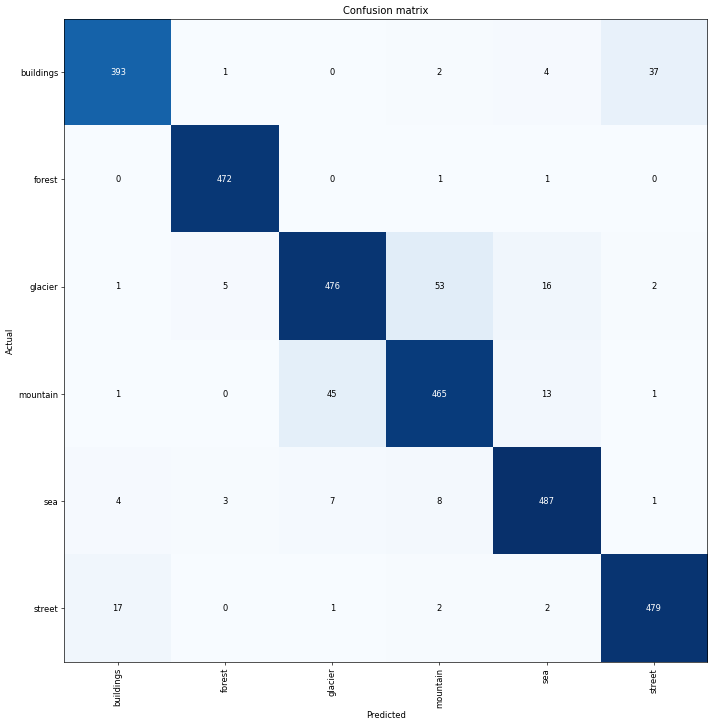

In [69]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [70]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


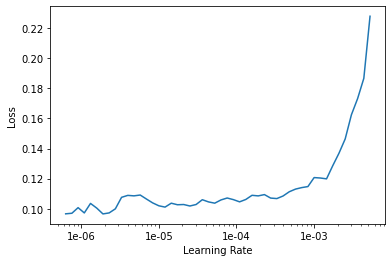

In [71]:
learn.recorder.plot()

In [72]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.117344,0.208708,0.074000,01:38
1,0.111810,0.212815,0.074000,01:39


In [73]:
interp = ClassificationInterpretation.from_learner(learn)

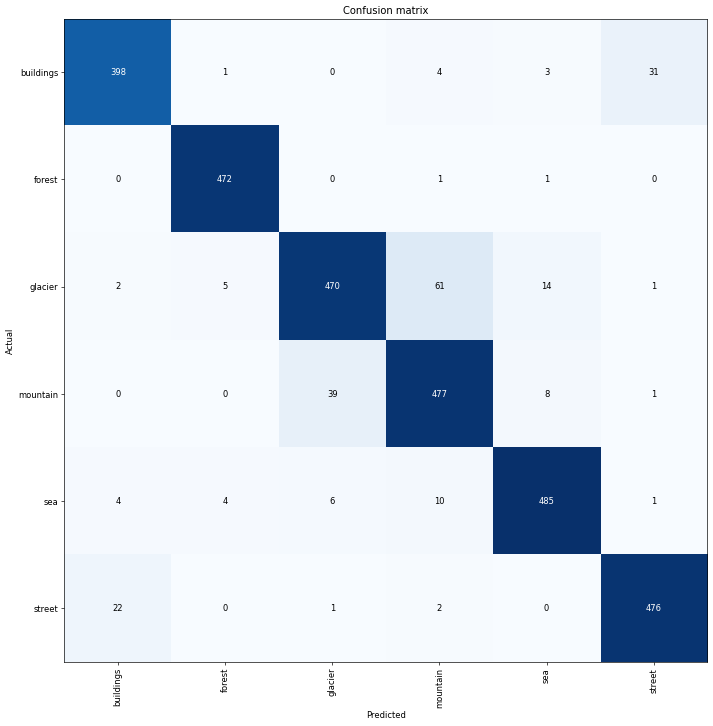

In [75]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [74]:
interp.most_confused(min_val=2)

[('glacier', 'mountain', 61),
 ('mountain', 'glacier', 39),
 ('buildings', 'street', 31),
 ('street', 'buildings', 22),
 ('glacier', 'sea', 14),
 ('sea', 'mountain', 10),
 ('mountain', 'sea', 8),
 ('sea', 'glacier', 6),
 ('glacier', 'forest', 5),
 ('buildings', 'mountain', 4),
 ('sea', 'buildings', 4),
 ('sea', 'forest', 4),
 ('buildings', 'sea', 3),
 ('glacier', 'buildings', 2),
 ('street', 'mountain', 2)]